In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.family']='Microsoft YaHei'
plt.rcParams['axes.unicode_minus']=False

In [2]:
df = pd.read_excel('order2021.xlsx')

In [3]:
df.head()

,订单顺序编号,订单号,用户名,商品编号,订单金额,付款金额,渠道编号,平台类型,下单时间,付款时间,是否退款
0,8,sys-2021-306447069,user-104863,PR000499,499.41,480.42,渠道1,微信公众号,2021-01-01 01:05:50,2021-01-01 01:06:17,否
1,11,sys-2021-417411381,user-181957,PR000483,279.53,279.53,渠道1,APP,2021-01-01 01:36:17,2021-01-01 01:36:56,否
2,61,sys-2021-313655292,user-282453,PR000154,1658.95,1653.91,渠道1,微信公众号,2021-01-01 12:01:04,2021-01-01 12:03:20,否
3,78,sys-2021-311884106,user-167776,PR000215,343.25,337.12,渠道1,APP,2021-01-01 12:47:02,2021-01-01 12:47:21,否
4,81,sys-2021-375273222,user-138024,PR000515,329.04,329.04,渠道1,APP,2021-01-01 12:50:23,2021-01-01 12:50:50,否


In [4]:
df.info

<bound method DataFrame.info of         订单顺序编号                 订单号          用户名      商品编号     订单金额  \
0            8  sys-2021-306447069  user-104863  PR000499   499.41   
1           11  sys-2021-417411381  user-181957  PR000483   279.53   
2           61  sys-2021-313655292  user-282453  PR000154  1658.95   
3           78  sys-2021-311884106  user-167776  PR000215   343.25   
4           81  sys-2021-375273222  user-138024  PR000515   329.04   
...        ...                 ...          ...       ...      ...   
104552   35716  sys-2021-300339928  user-270141  PR000984   328.83   
104553   55444  sys-2021-286784634  user-183770  PR000987   488.07   
104554   62378  sys-2021-288609013  user-213725  PR000845  1316.69   
104555   77890  sys-2021-251942165  user-100835  PR000263  3613.63   
104556   86627  sys-2021-322891956  user-116711  PR000676   802.18   

                付款金额 渠道编号   平台类型                下单时间                付款时间 是否退款  
0         480.420000  渠道1  微信公众号 2021-01-01 01:

In [5]:
df.describe()

,订单顺序编号,订单金额,付款金额
count,104557.000000,104557.000000,104557.000000
mean,52279.000000,1049.681521,1167.494225
std,30183.150385,1054.409968,2174.024855
min,1.000000,6.100000,-12.470000
25%,26140.000000,432.040000,383.660000
50%,52279.000000,679.320000,641.230000
75%,78418.000000,1248.280000,1252.630000
max,104557.000000,28465.250000,83270.053829


In [6]:
df.columns = df.columns.str.strip()
df.columns

Index(['订单顺序编号', '订单号', '用户名', '商品编号', '订单金额', '付款金额', '渠道编号', '平台类型', '下单时间',
       '付款时间', '是否退款'],
      dtype='object')

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

订单顺序编号    0
订单号       0
用户名       0
商品编号      0
订单金额      0
付款金额      0
渠道编号      8
平台类型      0
下单时间      0
付款时间      0
是否退款      0
dtype: int64

In [9]:
df.dropna(inplace=True)
df.isnull().sum()

订单顺序编号    0
订单号       0
用户名       0
商品编号      0
订单金额      0
付款金额      0
渠道编号      0
平台类型      0
下单时间      0
付款时间      0
是否退款      0
dtype: int64

In [10]:
abnormal = df[np.where(df['付款金额'] < 0, True, False)]
abnormal

,订单顺序编号,订单号,用户名,商品编号,订单金额,付款金额,渠道编号,平台类型,下单时间,付款时间,是否退款
23860,66573,sys-2021-288096069,user-186966,PR000511,136.99,-12.34,渠道5,APP,2021-09-08 21:32:54,2021-09-08 21:33:10,否
24753,96939,sys-2021-323229098,user-198083,PR000548,126.92,-11.13,渠道5,APP,2021-12-10 14:24:13,2021-12-10 14:24:26,是
29600,31393,sys-2021-296608442,user-212991,PR000385,112.91,-10.17,渠道7,APP,2021-05-24 08:52:04,2021-05-24 08:52:23,否
35486,999,sys-2021-324068352,user-112962,PR000602,364.08,-12.47,渠道8,微信公众号,2021-01-04 10:47:05,2021-01-04 10:47:05,否
62781,72266,sys-2021-316685479,user-189901,PR000554,2287.74,-10.98,渠道11,微信公众号,2021-09-28 11:57:46,2021-09-28 11:57:46,否
71784,18684,sys-2021-311194385,user-110299,PR000797,118.06,-10.08,渠道13,web网站,2021-04-06 11:20:43,2021-04-06 11:21:31,否


In [11]:
abindex = abnormal.index
df.drop(abindex, inplace = True)
print(df.shape)

(104543, 11)


In [12]:
df['订单日期'] = pd.to_datetime(df['付款时间'], format = '%Y-%m-%d').dt.date
df['月份'] = df['订单日期'].astype('datetime64[M]')
df.head()

,订单顺序编号,订单号,用户名,商品编号,订单金额,付款金额,渠道编号,平台类型,下单时间,付款时间,是否退款,订单日期,月份
0,8,sys-2021-306447069,user-104863,PR000499,499.41,480.42,渠道1,微信公众号,2021-01-01 01:05:50,2021-01-01 01:06:17,否,2021-01-01,2021-01-01
1,11,sys-2021-417411381,user-181957,PR000483,279.53,279.53,渠道1,APP,2021-01-01 01:36:17,2021-01-01 01:36:56,否,2021-01-01,2021-01-01
2,61,sys-2021-313655292,user-282453,PR000154,1658.95,1653.91,渠道1,微信公众号,2021-01-01 12:01:04,2021-01-01 12:03:20,否,2021-01-01,2021-01-01
3,78,sys-2021-311884106,user-167776,PR000215,343.25,337.12,渠道1,APP,2021-01-01 12:47:02,2021-01-01 12:47:21,否,2021-01-01,2021-01-01
4,81,sys-2021-375273222,user-138024,PR000515,329.04,329.04,渠道1,APP,2021-01-01 12:50:23,2021-01-01 12:50:50,否,2021-01-01,2021-01-01


In [13]:
df1 = df[np.where(df['是否退款'] == '否', True, False)]

In [14]:
df1['订单日期'] = df1['订单日期'].astype('datetime64[D]')

Text(0.5, 1.0, '每月的产品消费人数')

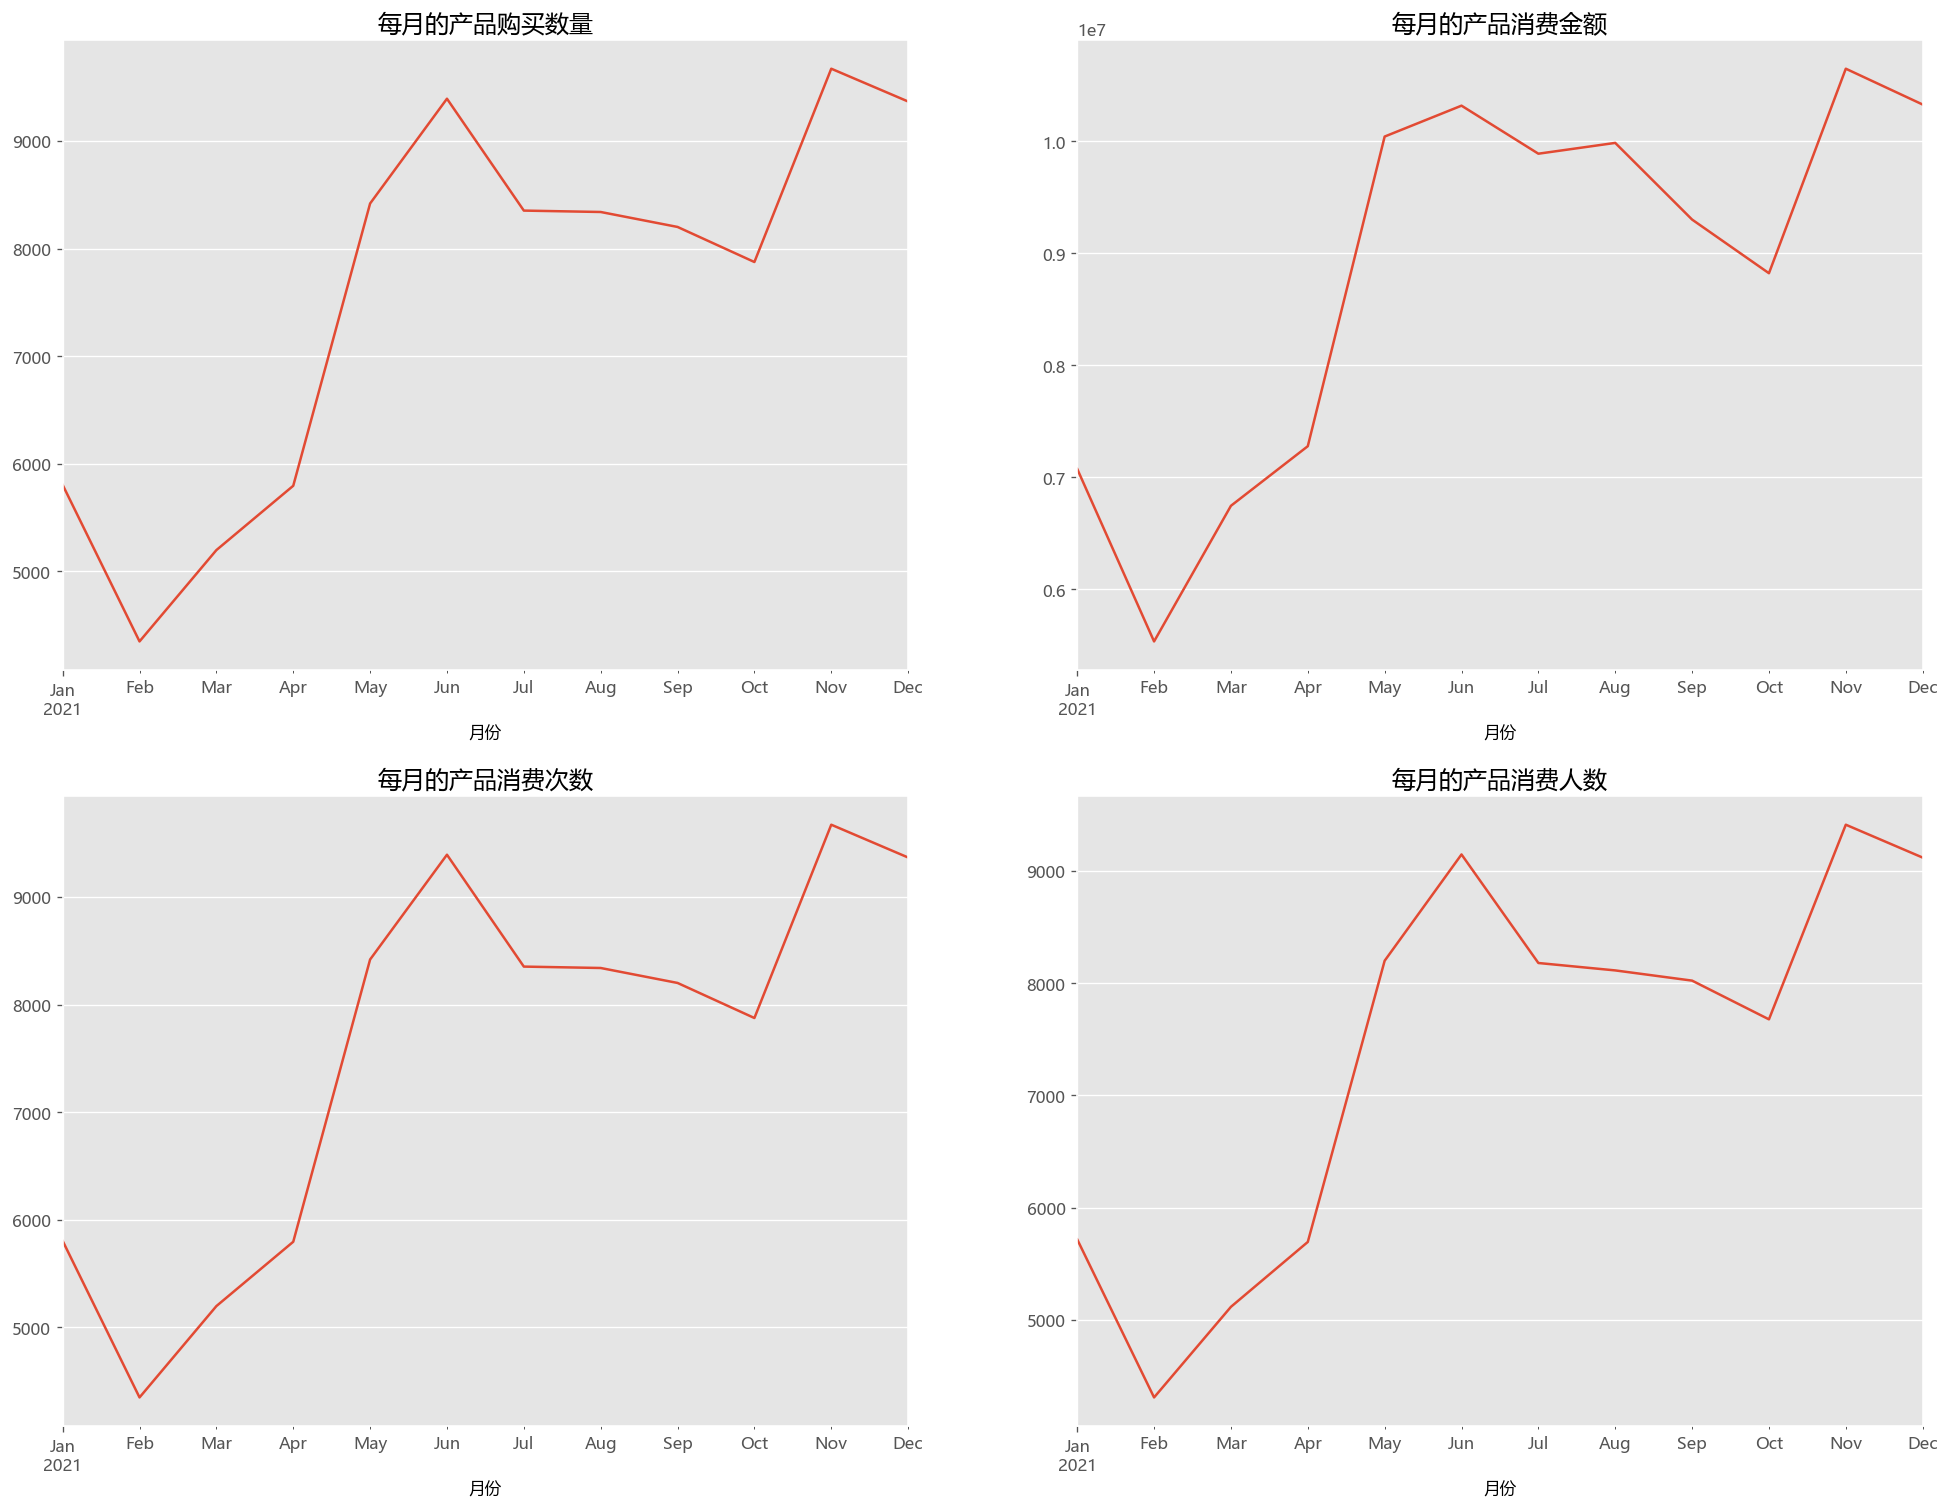

In [15]:
plt.figure(figsize=(20,15), dpi=120)
plt.subplot(221)
df1.groupby(by='月份')['商品编号'].count().plot()
plt.title('每月的产品购买数量')

plt.subplot(222)
df1.groupby(by='月份')['付款金额'].sum().plot()
plt.title('每月的产品消费金额')

plt.subplot(223)
df1.groupby(by='月份')['用户名'].count().plot()
plt.title('每月的产品消费次数')

plt.subplot(224)
df1.groupby(by='月份')['用户名'].apply(lambda x: len(x.drop_duplicates())).plot()
plt.title('每月的产品消费人数')

In [16]:
user_grouped = df1.groupby(by='用户名').sum()
df1.describe()

,订单顺序编号,订单金额,付款金额
count,90763.000000,90763.000000,90763.000000
mean,52279.387834,1048.012049,1167.386643
std,30162.353563,1050.926836,2191.822630
min,1.000000,6.100000,0.000000
25%,26150.500000,432.065000,384.120000
50%,52304.000000,678.900000,641.020000
75%,78353.500000,1245.955000,1248.825000
max,104557.000000,28465.250000,83270.053829


In [17]:
user_grouped.describe()

,订单顺序编号,订单金额,付款金额
count,71253.000000,71253.000000,71253.000000
mean,66594.165551,1334.971406,1487.032320
std,44849.517780,1322.729813,2563.956462
min,1.000000,6.100000,0.000000
25%,32423.000000,494.990000,449.090000
50%,62998.000000,844.680000,805.280000
75%,91413.000000,1767.930000,1779.580000
max,559784.000000,32623.050000,83270.053829


Text(0.5, 1.0, '散点图')

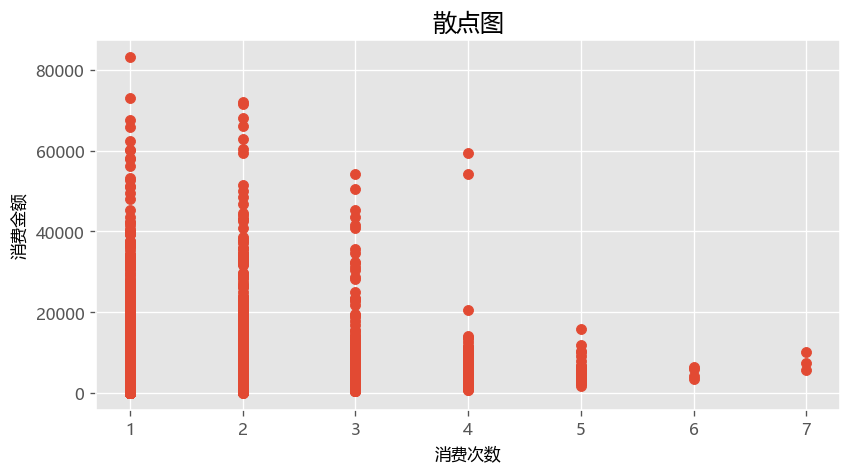

In [18]:
plt.figure(figsize=(8,4), dpi=120)
dfy = df1.groupby('用户名')['付款金额'].sum()
dfx = df1.groupby('用户名')['付款金额'].count()
plt.scatter(dfx, dfy)
plt.ylabel('消费金额')
plt.xlabel('消费次数')
plt.title('散点图')

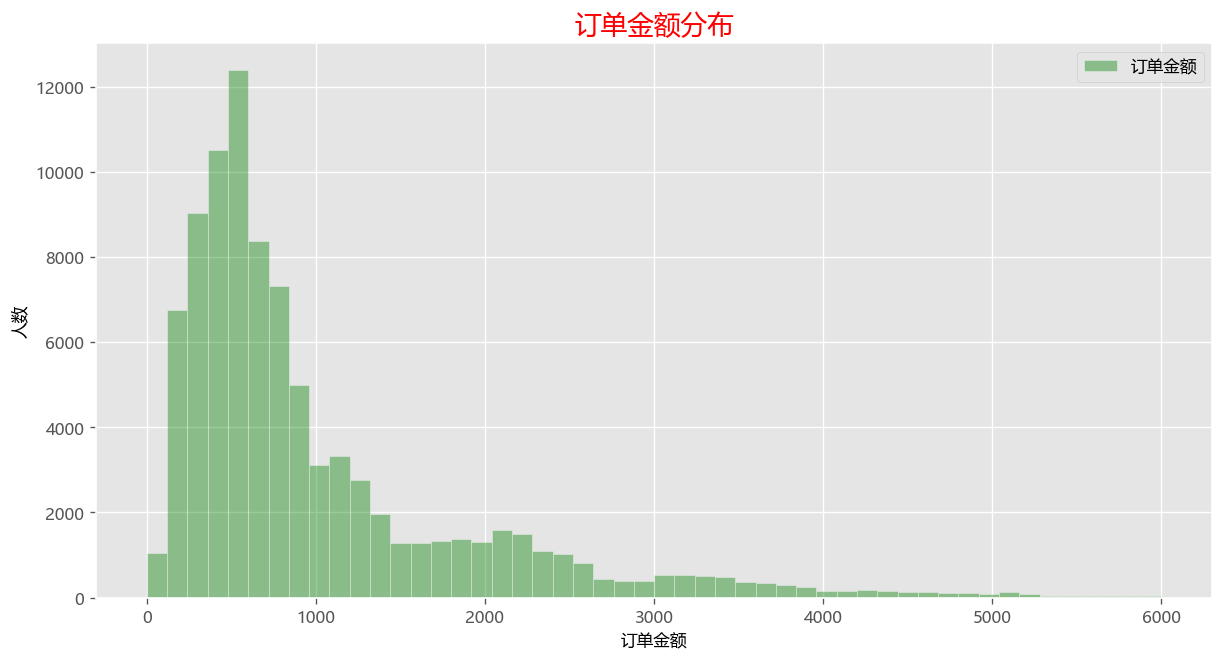

In [19]:
plt.figure(figsize=(12,6), dpi=120)
plt.hist(df1['订单金额'], bins=50, range=(0,6000),
        color='g',label='订单金额',
        histtype='bar',density=False,
        edgecolor='white',alpha=0.4)

plt.title('订单金额分布',fontdict={'fontsize': 16, 'color':'r'})
plt.xlabel('订单金额')
plt.ylabel('人数')
plt.legend(loc = 'best')



偏度 3.143079950069152
峰度 22.31851806751349


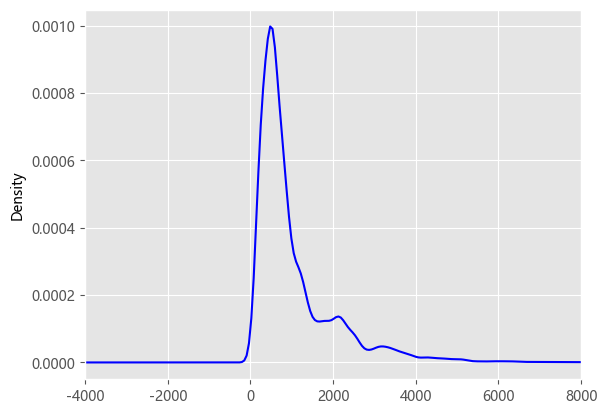

In [20]:
data1 = df1['订单金额']
data1.plot(kind='kde', color='b', xlim=(-4000, 8000))

print('偏度', data1.skew())
print('峰度', data1.kurtosis())

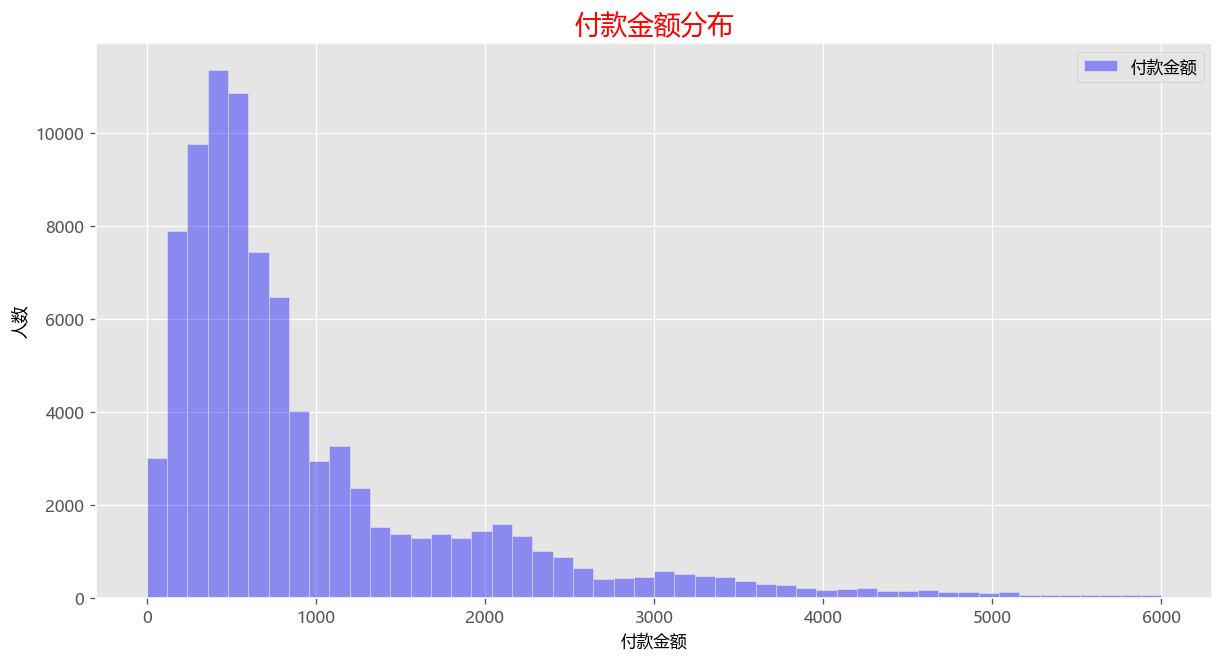

In [21]:
plt.figure(figsize=(12,6), dpi=120)
plt.hist(df1['付款金额'], bins=50, range=(0,6000),
        color='b',label='付款金额',
        histtype='bar',density=False,
        edgecolor='white',alpha=0.4)

plt.title('付款金额分布',fontdict={'fontsize': 16, 'color':'r'})
plt.xlabel('付款金额')
plt.ylabel('人数')
plt.legend(loc = 'best')

偏度 12.58433574310066
峰度 253.66653534018243


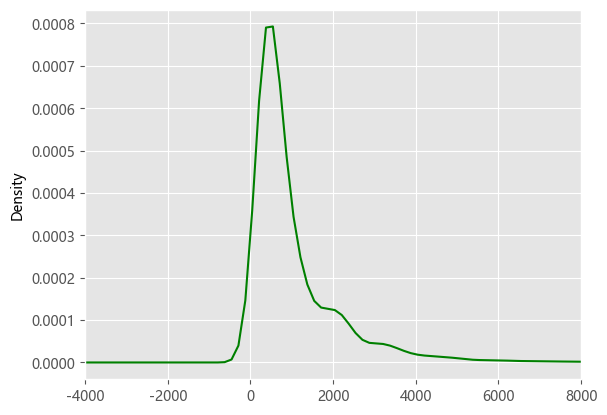

In [22]:
data2 = df1['付款金额']
data2.plot(kind='kde', color='g', xlim=(-4000, 8000))

print('偏度', data2.skew())
print('峰度', data2.kurtosis())

In [23]:
user_cumsum = df1.groupby('用户名')['付款金额'].sum().sort_values().reset_index()
user_cumsum

,用户名,付款金额
0,user-245344,0.000000
1,user-145225,0.000000
2,user-134426,0.000000
3,user-228811,0.000000
4,user-152569,0.000000
...,...,...
71248,user-104351,68038.702638
71249,user-274887,71622.079997
71250,user-107811,72149.091666
71251,user-121492,73167.667065


In [24]:
user_cumsum['付款金额累加'] = user_cumsum['付款金额'].cumsum()
user_cumsum.tail()

,用户名,付款金额,付款金额累加
71248,user-104351,68038.702638,1.056553e+08
71249,user-274887,71622.079997,1.057269e+08
71250,user-107811,72149.091666,1.057991e+08
71251,user-121492,73167.667065,1.058722e+08
71252,user-213338,83270.053829,1.059555e+08


In [25]:
amount_total = user_cumsum['付款金额累加'].max()
user_cumsum['prop'] = user_cumsum.apply(lambda x: x['付款金额累加']/amount_total, axis=1)
user_cumsum.tail()

,用户名,付款金额,付款金额累加,prop
71248,user-104351,68038.702638,1.056553e+08,0.997167
71249,user-274887,71622.079997,1.057269e+08,0.997843
71250,user-107811,72149.091666,1.057991e+08,0.998524
71251,user-121492,73167.667065,1.058722e+08,0.999214
71252,user-213338,83270.053829,1.059555e+08,1.000000


<Axes: >

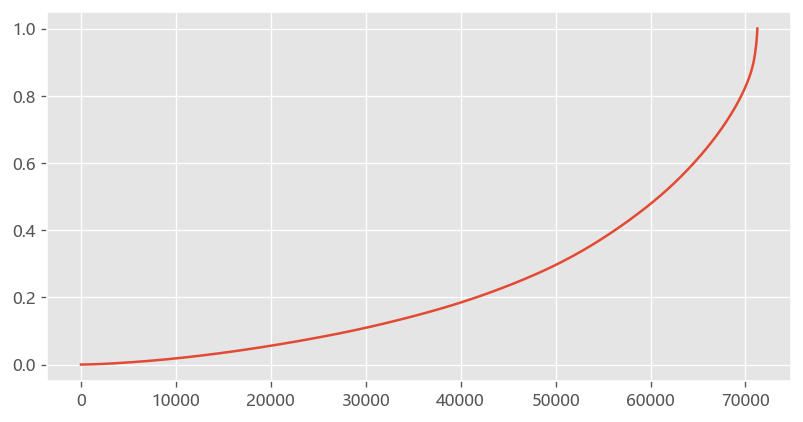

In [26]:
plt.figure(figsize=(8, 4), dpi=120)
user_cumsum['prop'].plot()

<Axes: >

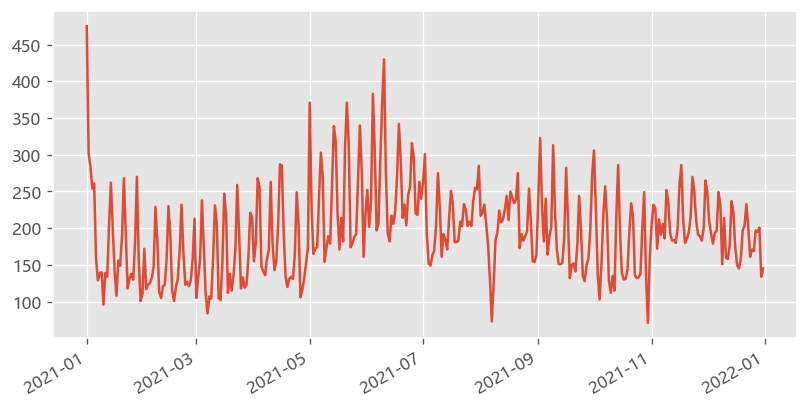

In [27]:
plt.figure(figsize=(8,4), dpi=120)
df1.groupby(by='用户名')['订单日期'].min().value_counts().plot()

<Axes: >

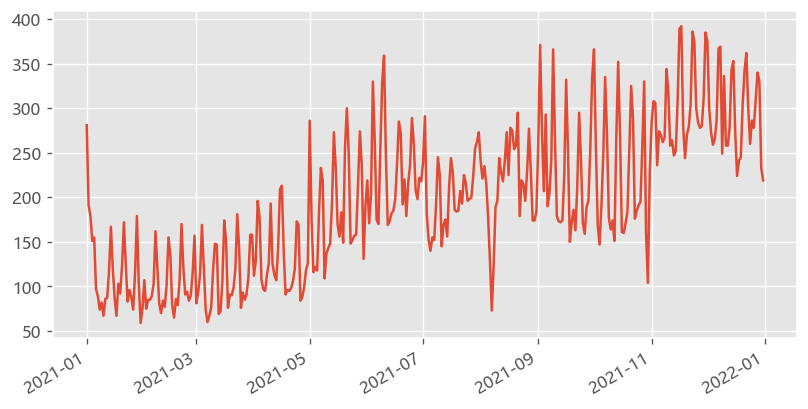

In [28]:
plt.figure(figsize=(8,4), dpi=120)
df1.groupby(by='用户名')['订单日期'].max().value_counts().plot()

In [29]:
rfm = df1.pivot_table(index='用户名',
                     values=['订单日期', '订单号', '付款金额'],
                     aggfunc={
                         '订单日期': 'max',
                         '订单号': 'count',
                         '付款金额': 'sum'
                     })

rfm['R'] = (rfm['订单日期'].max() - rfm['订单日期']) / np.timedelta64(1, 'D')
rfm.rename(columns={'订单号':'F', '付款金额':'M'}, inplace=True)
rfm.head()

,M,F,订单日期,R
用户名,,,,
user-100000,1770.81,1,2021-10-13,79.0
user-100003,511.59,1,2021-05-24,221.0
user-100006,443.55,1,2021-11-14,47.0
user-100007,2162.14,1,2021-01-14,351.0
user-100008,4879.94,1,2021-11-16,45.0


In [30]:
def rfm_func(x):
    level = x.apply(lambda x: '1' if x >= 1 else '0')
    label = level['R'] + level['F'] + level['M']
    d = {
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要发展客户',
        '001':'重要挽留客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般发展客户',
        '000':'一般挽留客户'
    }
    result = d[label]
    return result
rfm['label'] = rfm[['R','F','M']].apply(lambda x: x-x.mean()).apply(rfm_func, axis=1)
rfm.head()

,M,F,订单日期,R,label
用户名,,,,,
user-100000,1770.81,1,2021-10-13,79.0,重要挽留客户
user-100003,511.59,1,2021-05-24,221.0,一般发展客户
user-100006,443.55,1,2021-11-14,47.0,一般挽留客户
user-100007,2162.14,1,2021-01-14,351.0,重要发展客户
user-100008,4879.94,1,2021-11-16,45.0,重要挽留客户


Text(0, 0.5, 'M')

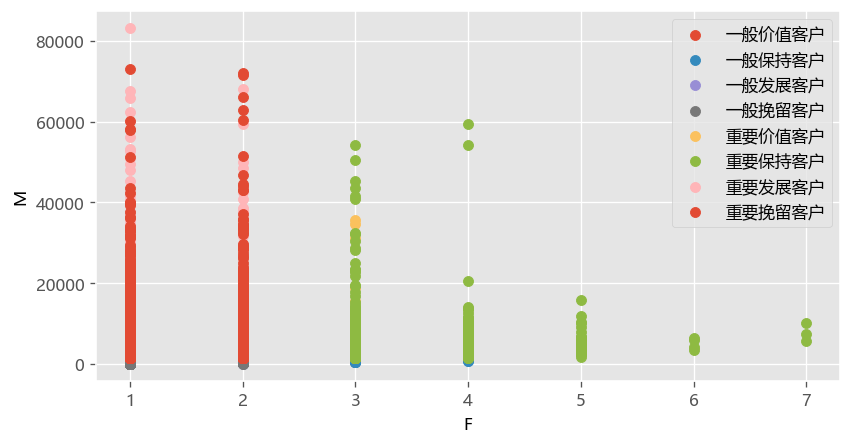

In [31]:
plt.figure(figsize=(8,4),dpi=120)
for label, grouped in rfm.groupby(by='label'):
    x = grouped['F']
    y = grouped['M']
    plt.scatter(x, y, label=label)
plt.legend()
plt.xlabel('F')
plt.ylabel('M')

In [32]:
pivoted_counts = df1.pivot_table(
index='用户名',
columns='月份',
values='订单日期',
aggfunc='count').fillna(0)
pivoted_counts

月份,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01
用户名,,,,,,,,,,,,
user-100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
user-100003,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user-100006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
user-100007,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user-100008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
user-299980,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
user-299983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
user-299989,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
df_purchase = pivoted_counts.applymap(lambda x:1 if x>0 else 0)
df_purchase.head()

月份,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01
用户名,,,,,,,,,,,,
user-100000,0,0,0,0,0,0,0,0,0,1,0,0
user-100003,0,0,0,0,1,0,0,0,0,0,0,0
user-100006,0,0,0,0,0,0,0,0,0,0,1,0
user-100007,1,0,0,0,0,0,0,0,0,0,0,0
user-100008,0,0,0,0,0,0,0,0,0,0,1,0


In [34]:
def active_status(data):
    status = []
    for i in range(12) :
        if data[i] == 0:
            if len(status) == 0:
                status.append('unreg')
            else:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('不活跃用户')
        else:
            if len(status) == 0:
                status.append('新用户')
            else:
                if status[i-1] == 'unreg':
                    status.append('新用户')
                elif status[i-1] == '不活跃用户':
                    status.append('回流用户')
                else:
                    status.append('活跃用户')
    return pd.Series(status, df_purchase.columns)
purchase_states = df_purchase.apply(active_status, axis=1)


In [35]:
purchase_states_ct = purchase_states.replace('unreg', np.NaN).apply(lambda x: pd.value_counts(x))
purchase_states_ct.head()


月份,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01
不活跃用户,NaN,5585.0,9629,14320,19128,25960,33491,39748,45691,51377,55989,62135
回流用户,NaN,NaN,149,267,633,951,1179,1521,1797,1988,2666,2808
新用户,5717.0,4177.0,4851,5269,7313,7779,6564,6191,5852,5341,6346,5853
活跃用户,NaN,132.0,116,158,253,416,436,401,373,348,399,457


<Axes: xlabel='月份'>

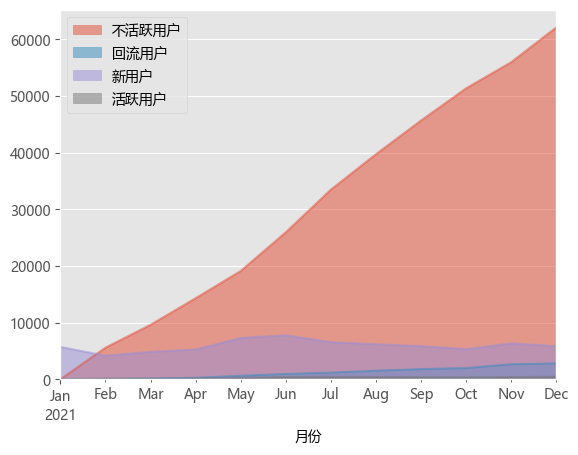

In [36]:
purchase_states_ct.T.fillna(0).plot.area(stacked=False)

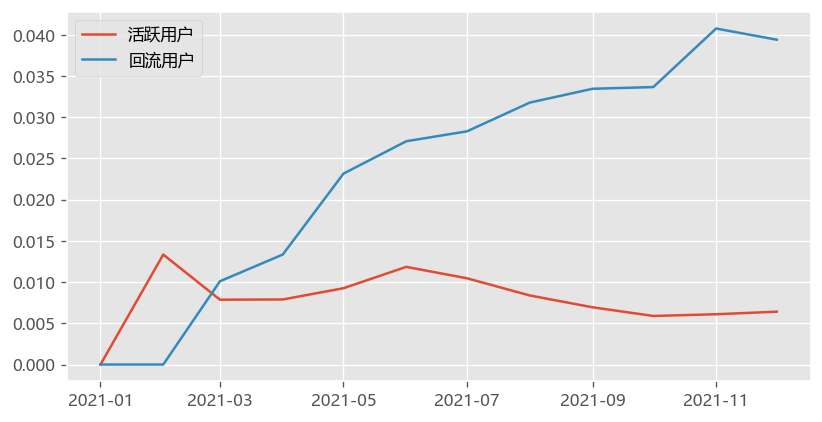

In [37]:
plt.figure(figsize=(8,4),dpi=120)
rate = purchase_states_ct.T.fillna(0).apply(lambda x: x/x.sum(), axis=1)
plt.plot(rate['活跃用户'], label='活跃用户')
plt.plot(rate['回流用户'], label='回流用户')
plt.legend()

In [38]:
order_diff = df1.groupby(by='用户名').apply(lambda x: abs(x['订单日期']-x['订单日期'].shift()))
order_diff.head()

用户名               
user-100000  48767   NaT
user-100003  59056   NaT
user-100006  6993    NaT
user-100007  92325   NaT
user-100008  7073    NaT
Name: 订单日期, dtype: timedelta64[ns]

19510

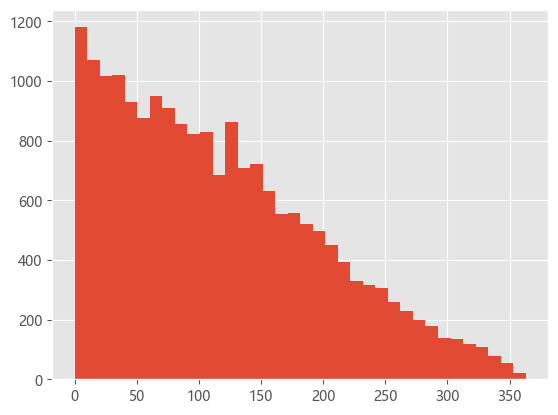

In [39]:
(order_diff/np.timedelta64(1,'D')).hist(bins=36)
order_diff.count()

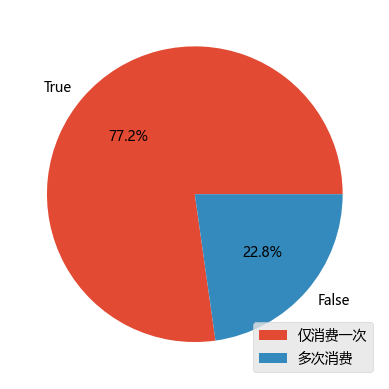

In [40]:
user_life = df1.groupby(by='用户名')['订单日期'].agg(['min','max'])
(user_life['max'] == user_life['min']).value_counts().plot.pie(autopct='%.1f%%')
plt.legend(['仅消费一次','多次消费'])


In [41]:
(user_life['max'] - user_life['min']).describe()

count                         71253
mean     29 days 00:25:36.339522546
std      67 days 07:49:42.751339793
min                 0 days 00:00:00
25%                 0 days 00:00:00
50%                 0 days 00:00:00
75%                 0 days 00:00:00
max               363 days 00:00:00
dtype: object

Text(0, 0.5, '用户人数')

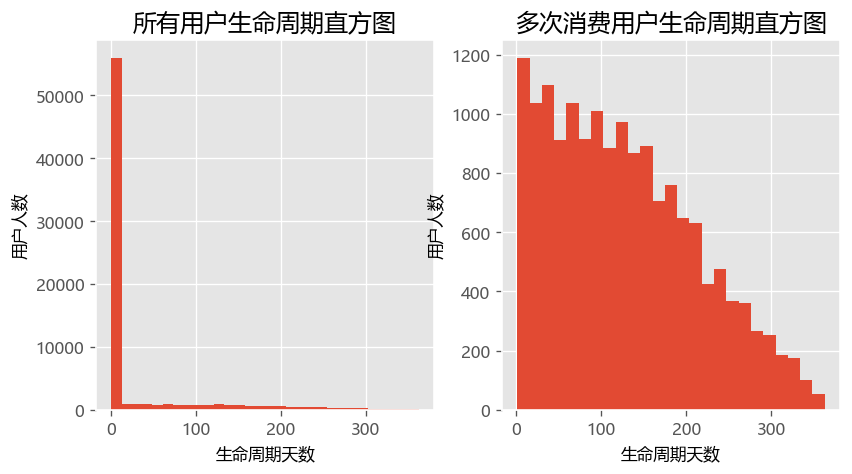

In [42]:
plt.figure(figsize=(8,4), dpi=120)
plt.subplot(121)
((user_life['max']-user_life['min'])/np.timedelta64(1,'D')).hist(bins=30)
plt.title('所有用户生命周期直方图')
plt.xlabel('生命周期天数')
plt.ylabel('用户人数')

plt.subplot(122)
u_1=(user_life['max']-user_life['min'])/np.timedelta64(1,'D')
u_1[u_1>0].hist(bins=25)
plt.title('多次消费用户生命周期直方图')
plt.xlabel('生命周期天数')
plt.ylabel('用户人数')

In [43]:
u_1[u_1>0].mean()


127.4646445965107

<Axes: xlabel='月份'>

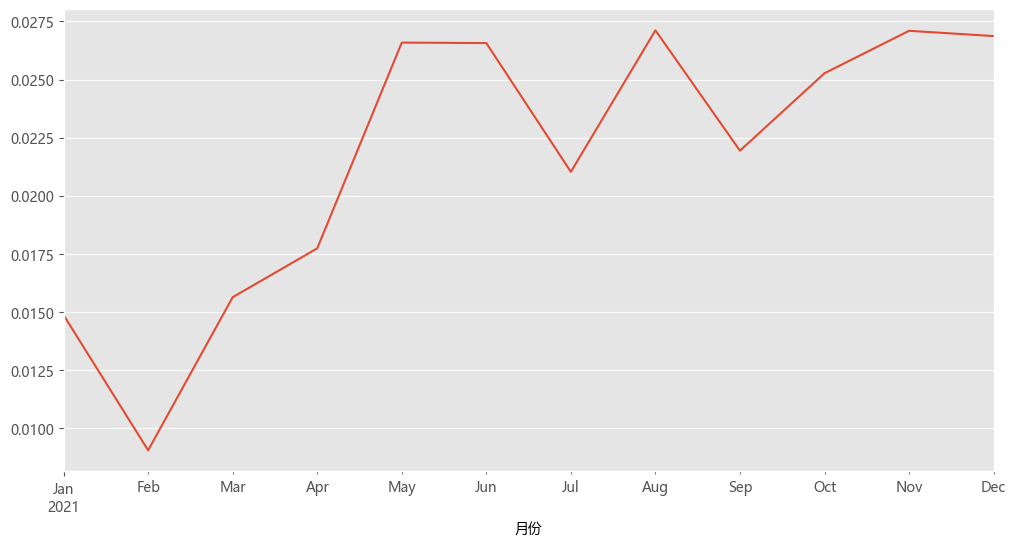

In [44]:
purchase_r = pivoted_counts.applymap(lambda x:1 if x>1 else np.NaN if x==0 else 0)
purchase_r.head()
(purchase_r.sum()/purchase_r.count()).plot(figsize=(12,6))


In [45]:
def purchase_back(data):
    status = []
    for i in range(11):
        if data[i] == 1:
            if data[i+1] == 1:
                status.append(1)
            elif data[i+1] == 0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return pd.Series(status, df_purchase.columns)
purchase_b = df_purchase.apply(purchase_back,axis=1)
purchase_b.head()

月份,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01
用户名,,,,,,,,,,,,
user-100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
user-100003,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user-100006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
user-100007,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user-100008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


Text(0, 0.5, '人数')

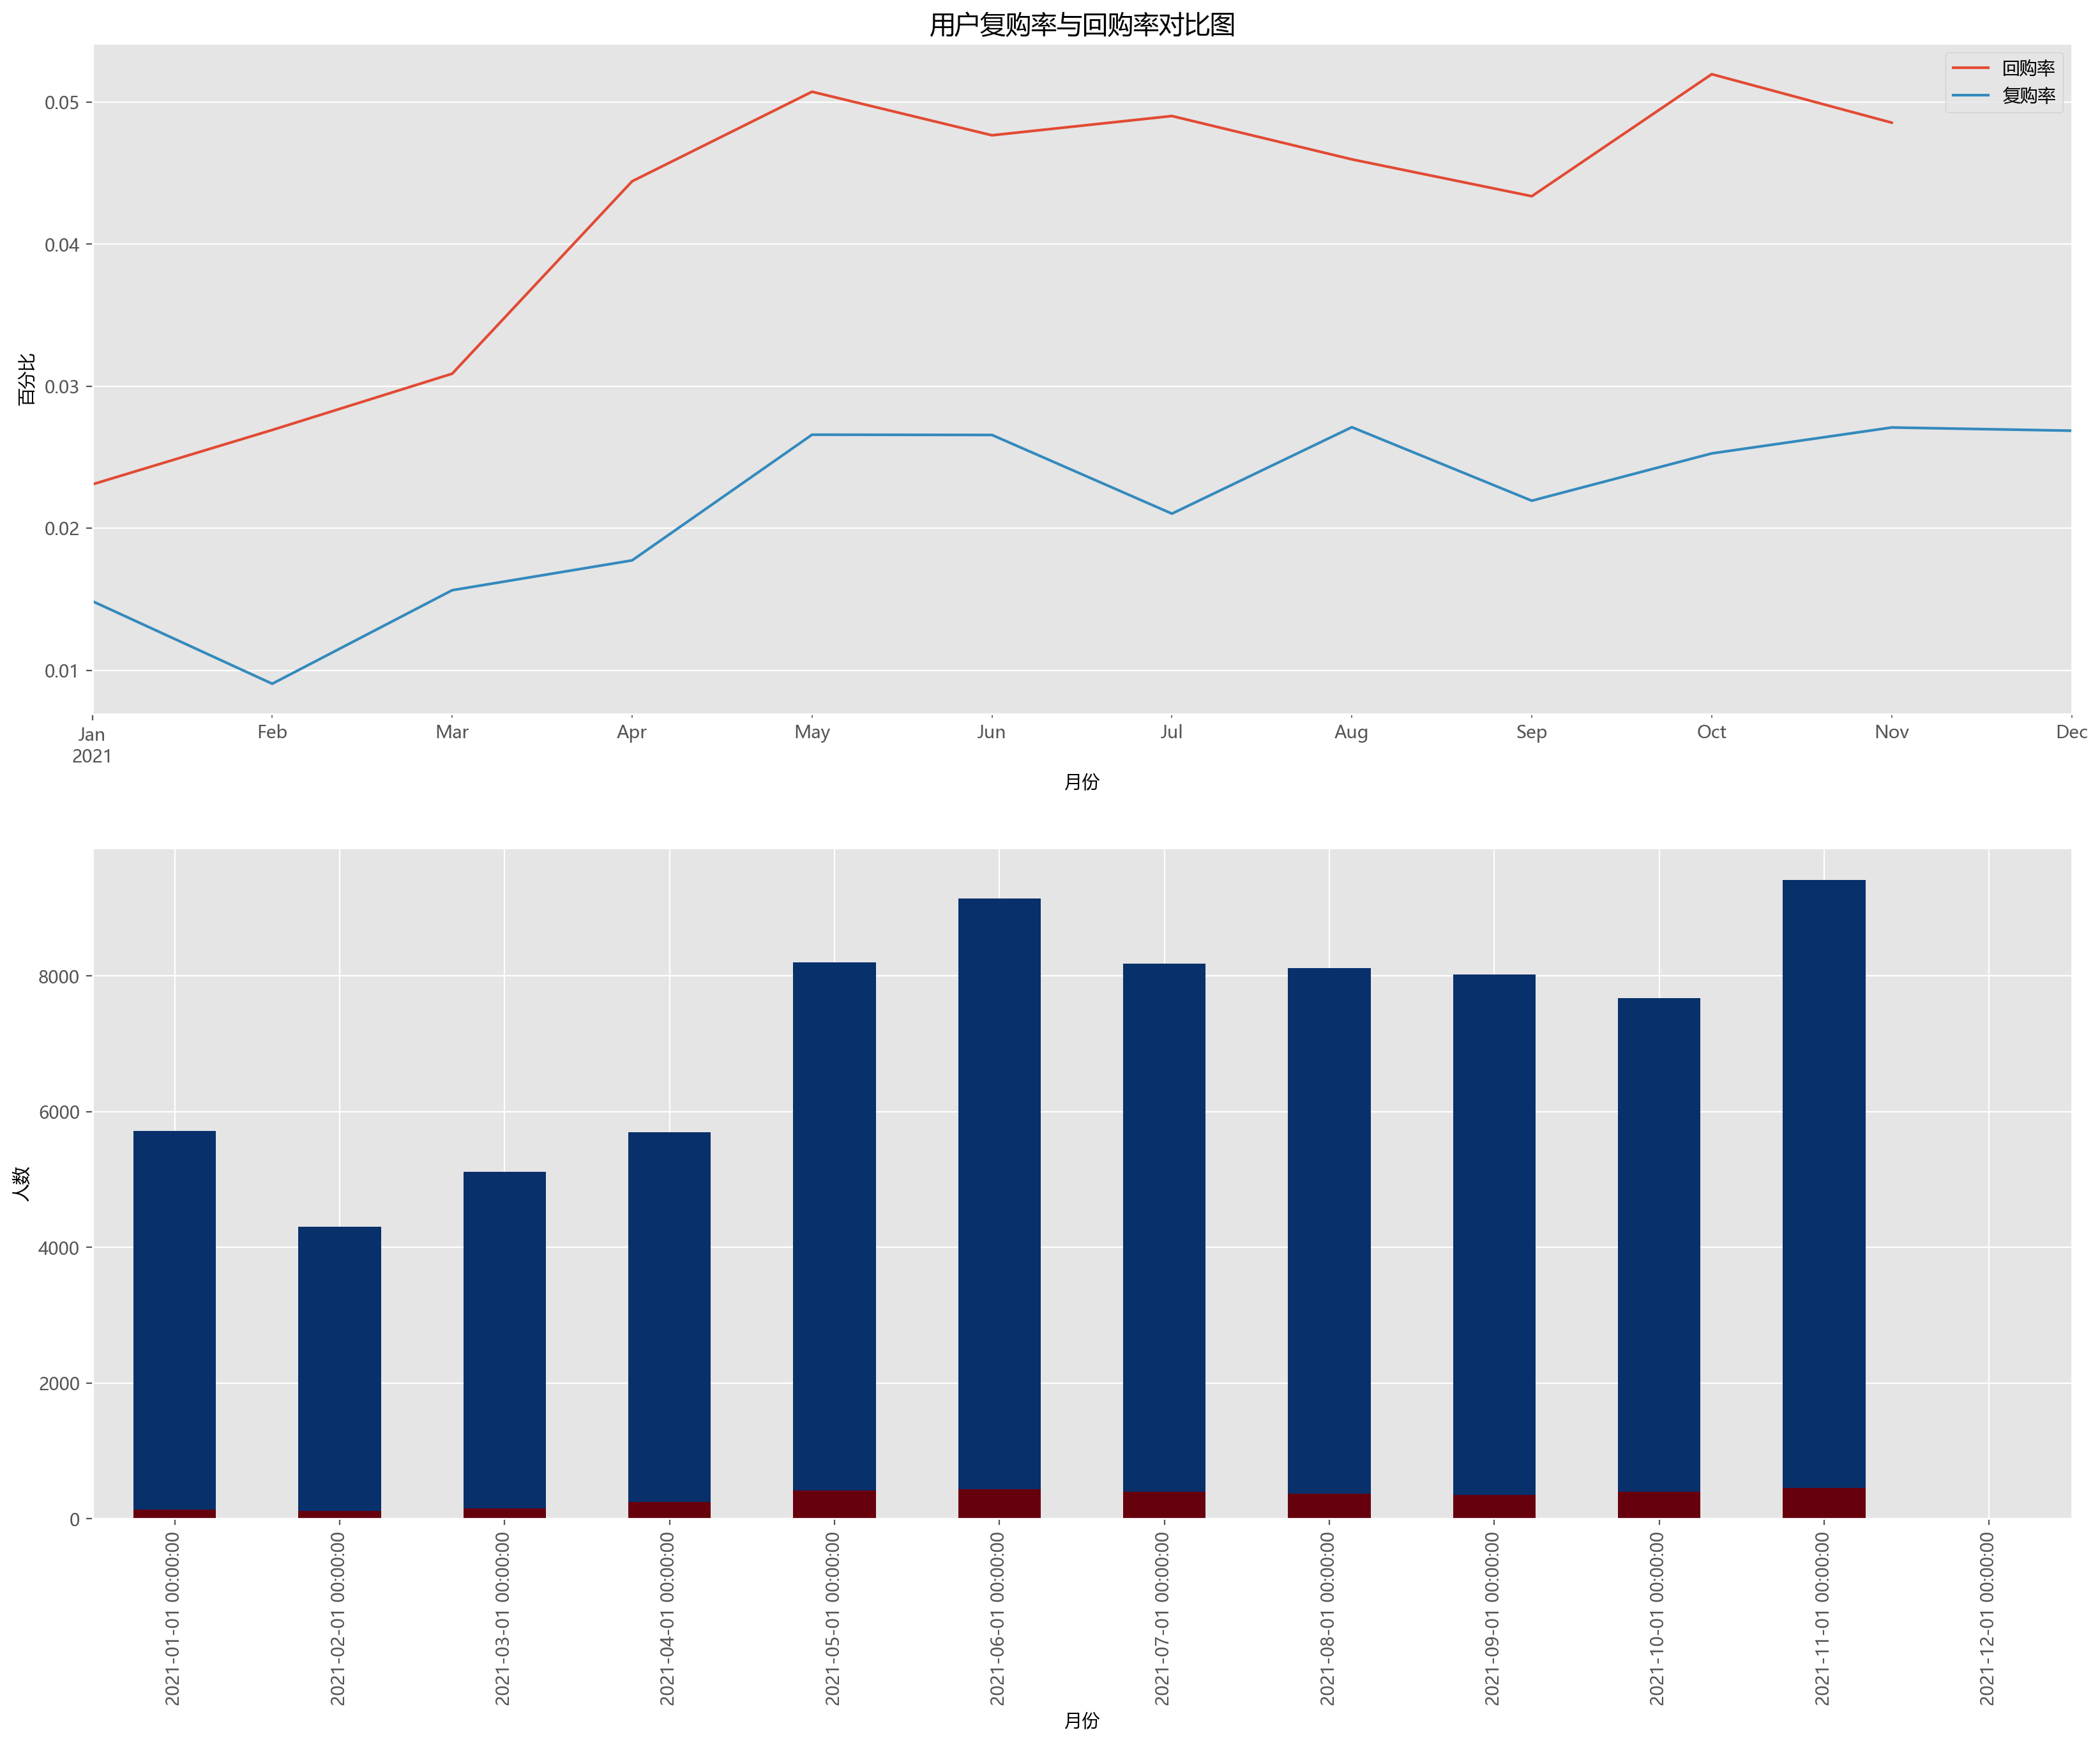

In [46]:
plt.figure(figsize=(20,15),dpi=200)
plt.subplot(211)
(purchase_b.sum()/purchase_b.count()).plot(label='回购率')
(purchase_r.sum()/purchase_r.count()).plot(label='复购率')
plt.legend()
plt.ylabel('百分比')
plt.title('用户复购率与回购率对比图')

plt.subplot(212)
purchase_b.count().plot(kind='bar', colormap='Blues_r')
purchase_b.sum().plot(kind='bar',colormap='Reds_r',stacked=False)

plt.xlabel('月份')
plt.ylabel('人数')

In [47]:
df_purchase.info()


<class 'pandas.core.frame.DataFrame'>
Index: 71253 entries, user-100000 to user-299995
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   2021-01-01 00:00:00  71253 non-null  int64
 1   2021-02-01 00:00:00  71253 non-null  int64
 2   2021-03-01 00:00:00  71253 non-null  int64
 3   2021-04-01 00:00:00  71253 non-null  int64
 4   2021-05-01 00:00:00  71253 non-null  int64
 5   2021-06-01 00:00:00  71253 non-null  int64
 6   2021-07-01 00:00:00  71253 non-null  int64
 7   2021-08-01 00:00:00  71253 non-null  int64
 8   2021-09-01 00:00:00  71253 non-null  int64
 9   2021-10-01 00:00:00  71253 non-null  int64
 10  2021-11-01 00:00:00  71253 non-null  int64
 11  2021-12-01 00:00:00  71253 non-null  int64
dtypes: int64(12)
memory usage: 7.1+ MB
